## Linear Regression - Bike Sharing Assignment
BoomBikes a Bike Sharing service company aspires to understand the demand for shared bikes among the people after ongoing quarantine situation ends across the nation due to Covid-19. 
The company wants to know: 
- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 



### Business Goal:
Build a Linear Regression Model to predict the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary 
with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for 
management to understand the demand dynamics of a new market.

### Solution Approach:
Perform a high-level analysis of the Bike Sharing data sheet to get an overview of the data description of columns provided.
 - Load data and view the data structures, data types, date formats, total number of records/columns etc.
 - Clean the data for Null values , Uniques values, drop unnecessary columns, Unwanted spaces/symbols in column values etc.
 - Format Date columns to aid the analysis.
 - Derive additional columns to aid our analysis .
 - Perform EDA(Exploratory data analysis) methods like Univariate/Segmented Univariate and Bivariate analysis using plots to
deduce the patterns and insights.
 - Use these data insights to build a Linear Regression data Model to Predict and recommend bike demand across the year on various factors.

#### Step 1 -  Data Understanding and EDA

In [482]:
# Import Libraries:
import numpy as np
import pandas as pd
from math import sqrt

# Import Plotting  Libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Model Building Libraries
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# Warnings Suppresion
import warnings
warnings.filterwarnings('ignore')

In [483]:
# Import Bike Sharing Dataset
Bike_df = pd.read_csv("day.csv")

In [484]:
# View first 5 records
Bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [485]:
# View last 5 records
Bike_df.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796
729,730,31-12-2019,1,1,12,0,1,1,2,8.849153,11.17435,57.7500,10.374682,439,2290,2729


In [486]:
# View dataset columns
Bike_df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [487]:
# View dataset rows/colmns 
Bike_df.shape

(730, 16)

There are 730 rows and 16 columns in the data set.

In [488]:
# Check Mean / Median / Mode and count of records
Bike_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [489]:
# View Null and datatypes
Bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [490]:
# Check for Null Values
Bike_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

 There are no null values in any of the columns

In [491]:
# Checking the null value percentage
Bike_df.isna().sum()/Bike_df.isna().count()*100

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

In [492]:
# Checking for duplicates
Bike_df.drop_duplicates(subset=None, inplace=True)
Bike_df.shape

(730, 16)

##### No Duplicates as the rows and columns matches the original count

### Step 2 - Visualize data / Prepare Data for Model building

. Separate numeric and categorical variables and visuvaliseing those variables
. Heare we are going to create the Target variable by droping some insignificant variables/ non_use variables
. Finding the outlires
. Finding duplicates
. Hear we are using univariate,Bivariate Analysis

#####  Separate numeric and categorical variables 

In [493]:
# Numerical Columns
Bike_df.select_dtypes(include=[np.number])

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


In [494]:
# Categorical Columns
Bike_df.select_dtypes(exclude=[np.number])

,dteday
0,01-01-2018
1,02-01-2018
2,03-01-2018
3,04-01-2018
4,05-01-2018
...,...
725,27-12-2019
726,28-12-2019
727,29-12-2019
728,30-12-2019


##### Drop columns that are irrelevant for the model 

- Instant is just a row instance identifier.
- dteday is removed as we have some of date features like mnth and year and weekday already in other columns 
- we will not consider day to day trend in demand for bikes.

In [495]:
# Drop Columns
Bike_df.drop(['instant','dteday'],axis = 1,inplace = True)
Bike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


##### Finding Target variable

- Target Variable is CNT - Casual and Registered Users
- To avoid multicollinearity delete the columns 'casual' and 'registered' and retail the target variable CNT

In [496]:
# Drop Columns
Bike_df.drop(['casual'], axis = 1, inplace = True)
Bike_df.drop(['registered'], axis = 1, inplace = True)

In [497]:
# Inspect dataframe after dropping some columns
Bike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [498]:
Bike_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 74.1 KB


In [499]:
Bike_df.shape

(730, 12)

##### Finding Outliers - Draw box plots for independent variables with continuous values

. For outliers we can draw box plots for indepent variables with continuous values

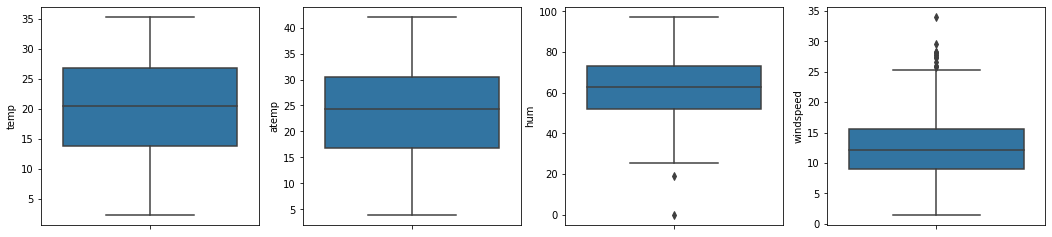

In [500]:
# Box plots 
cols = ['temp', 'atemp', 'hum', 'windspeed']
plt.figure(figsize=(18,4))

i = 1
for col in cols:
    plt.subplot(1,4,i)
    sns.boxplot(y=col, data=Bike_df)
    i+=1

Inferencess:
By looking at the plots clearlly we can notice there are no outliers.

##### Converting some Numeric Columns to Categorical Columns

In [501]:
# Convert Season
Bike_df.season = Bike_df.season.map({1: 'Spring',2:'Summer',3:'Fall',4:'Winter'})

In [502]:
#Checking whether the conversion is done properly or not 
Bike_df['season'].astype('category').value_counts()

Fall      188
Summer    184
Spring    180
Winter    178
Name: season, dtype: int64

In [503]:
#weathersit
Bike_df.weathersit.replace({1:'good',2:'moderate',3:'bad',4:'severe'},inplace = True)

In [504]:
#Checking the Post Conversion status
Bike_df['weathersit'].astype('category').value_counts()

good        463
moderate    246
bad          21
Name: weathersit, dtype: int64

In [505]:
#  Convert Month
Bike_df.mnth.replace({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun',
                  7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'},inplace=True)

In [506]:
#Checking the Post Conversion status
Bike_df['mnth'].astype('category').value_counts()

aug     62
dec     62
jan     62
jul     62
mar     62
may     62
oct     62
apr     60
jun     60
nov     60
sept    60
feb     56
Name: mnth, dtype: int64

In [507]:
# Weekday
Bike_df.weekday.replace({0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'},inplace=True)

In [508]:
#Checking the Post Conversion status
Bike_df['weekday'].astype('category').value_counts()

mon    105
sat    105
sun    105
fri    104
thu    104
tue    104
wed    103
Name: weekday, dtype: int64

In [509]:
# Check the dataframe again
Bike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,jan,0,sat,0,moderate,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,jan,0,sun,0,moderate,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,jan,0,mon,1,good,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,jan,0,tue,1,good,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,jan,0,wed,1,good,9.305237,11.46350,43.6957,12.522300,1600


In [510]:
# Checking shape again
Bike_df.shape

(730, 12)

##### Plotting Numeric Variables


<Figure size 1080x2160 with 0 Axes>

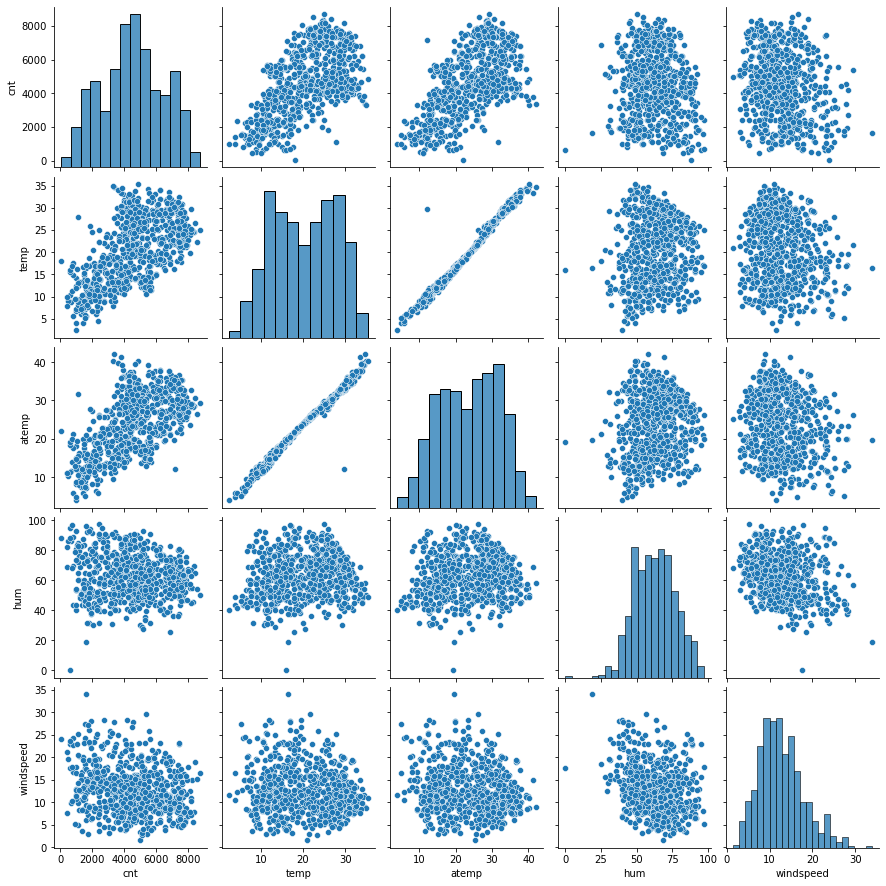

In [511]:
# Pairplot of all the numeric variables
plt.figure(figsize = (15,30))
sns.pairplot(data=Bike_df,vars=['cnt', 'temp', 'atemp', 'hum','windspeed'])
plt.show()

##### Insight
   - Looks like the temp and atemp has the highest corelation with the target variable cnt
   - Temp and atemp are highly co-related with each other

##### Plotting Categorical Variables

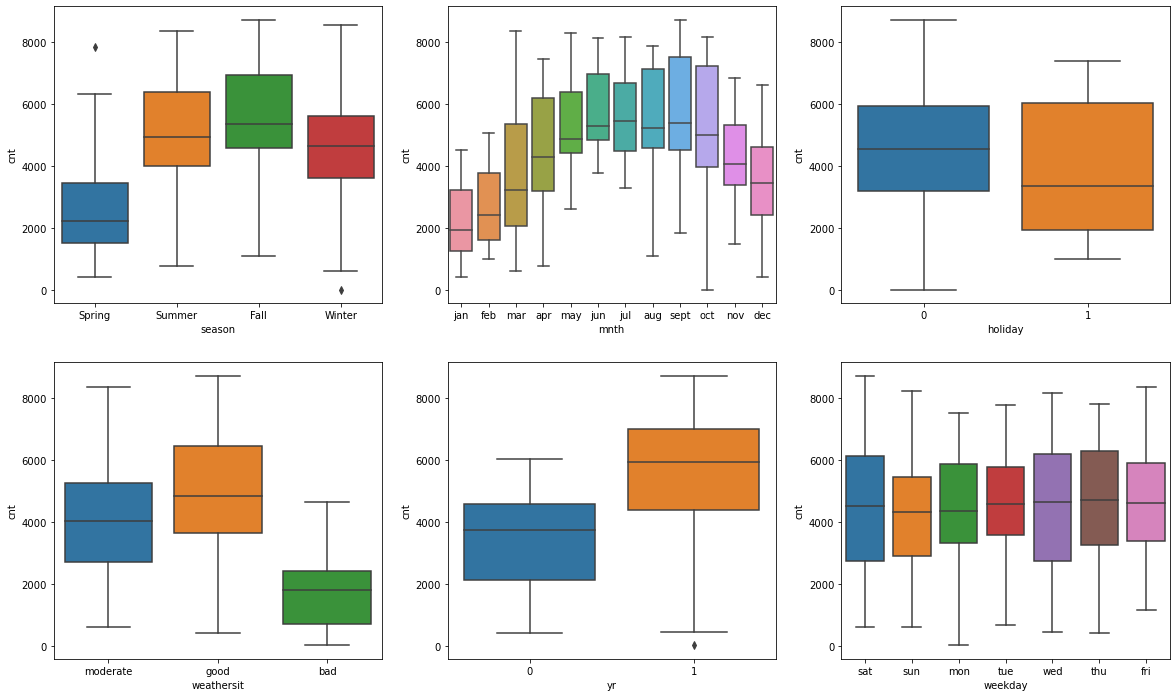

In [512]:
# Boxplots for categorical variables
# In the x axis we are using categorical variables and in the y axis we are using the cnt(target) variable
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = Bike_df)
plt.subplot(2,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data =Bike_df)
plt.subplot(2,3,3)
sns.boxplot(x = 'holiday', y = 'cnt', data = Bike_df)
plt.subplot(2,3,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = Bike_df)
plt.subplot(2,3,5)
sns.boxplot(x = 'yr', y = 'cnt', data = Bike_df)
plt.subplot(2,3,6)
sns.boxplot(x = 'weekday', y = 'cnt', data = Bike_df)
plt.show()

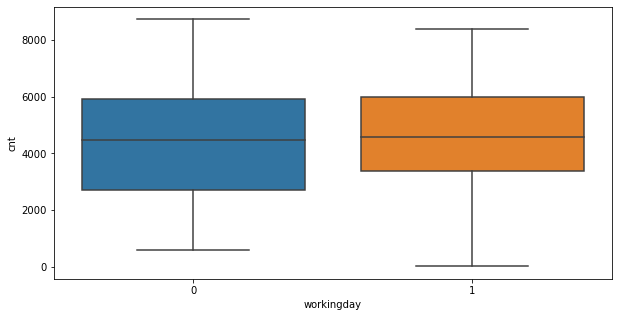

In [513]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'workingday', y = 'cnt', data = Bike_df)
plt.show()

##### Insight
 - The count of bike sharing is least for spring
 - The number of bike shares incresed in 2019
 - The cnt has zero values for weather situation - 'Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog'(cat no 4)
 - The cnt values increases in summer months
 - The cnt values are less during holidays
 - On workingday the cnt(Casual and Registered) is almost same for both

##### Creating dummy variables for the  categorical variables(season, mnth, weathersit, weekday)

In [514]:
# Creating dummy variables
dummy = Bike_df[['season','mnth','weekday','weathersit']]
dummy = pd.get_dummies(dummy,drop_first=True)

##### Add dummy variables to original dataset

In [515]:
Bike_df = pd.concat([dummy,Bike_df],axis = 1)

In [516]:
# Check Dataframe again
Bike_df.head()

,season_Spring,season_Summer,season_Winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,...,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,0,0,0,0,1,0,0,0,...,jan,0,sat,0,moderate,14.110847,18.18125,80.5833,10.749882,985
1,1,0,0,0,0,0,1,0,0,0,...,jan,0,sun,0,moderate,14.902598,17.68695,69.6087,16.652113,801
2,1,0,0,0,0,0,1,0,0,0,...,jan,0,mon,1,good,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,0,0,0,0,1,0,0,0,...,jan,0,tue,1,good,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,0,0,0,0,1,0,0,0,...,jan,0,wed,1,good,9.305237,11.46350,43.6957,12.522300,1600


In [517]:
# Check Shape Again
Bike_df.shape

(730, 34)

#####  Univariate and Bivariate Analysis for the numerical and categorical variables

Visualising the Dataframe to Find the Correlation between the Numerical Variable

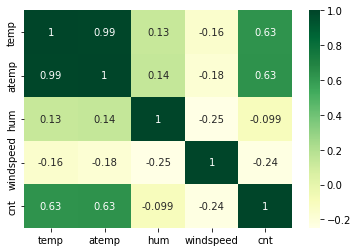

In [518]:
# Checking continuous variables Correlation relationship with each other
sns.heatmap(Bike_df[['temp','atemp','hum','windspeed','cnt']].corr(), cmap='YlGn', annot = True)
plt.show()

##### Insight - 
 -  temp and atemp has correlation 0.99  which means almost 1 (highly correlated) and atemp seems to be derived from temp so atemp field can be dropped here 

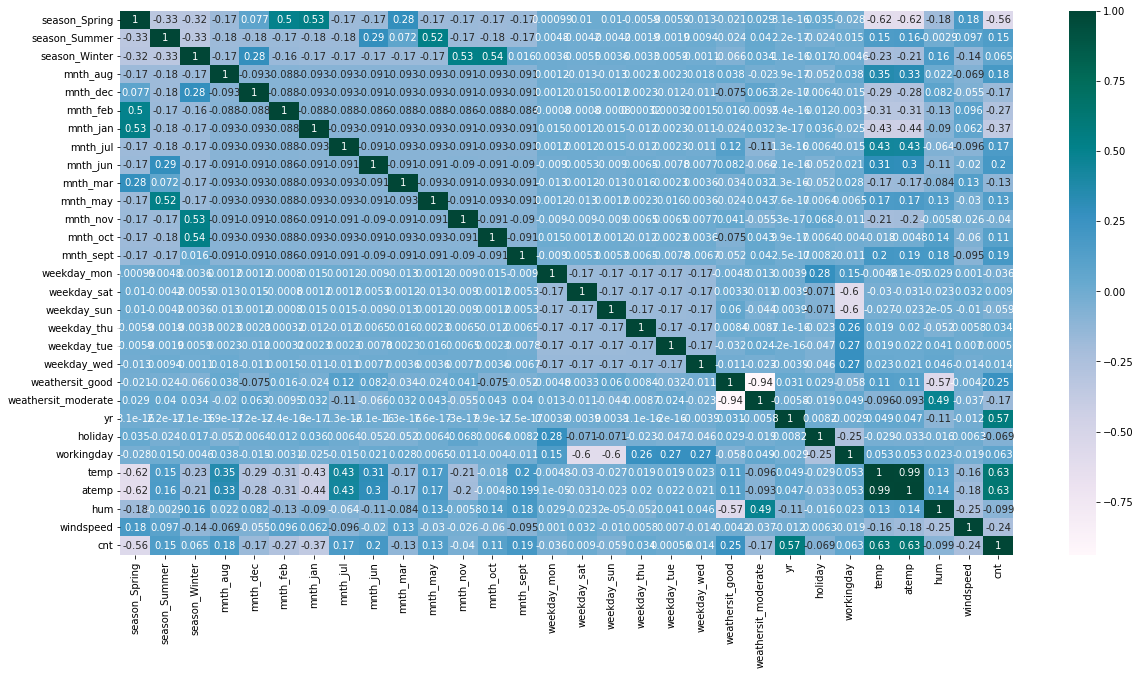

In [519]:
#Correlations for numeric variables
plt.figure(figsize = (20, 10))
cor=Bike_df.corr()
sns.heatmap(cor, cmap="PuBuGn", annot = True)
plt.show()

##### Insight - 
 - From the correlation map, season_winter and mnth_oct seems to be highly correlated with 0.54 and should be considered for the model.
 - However let us elminate it based on the Variance Inflation Factor later during the model building.
 - We also see Target variable has a linear relationship with some of the independent variables, so that we can drop the atemp variable
 - temp variable also highlly corelated with target variable with 0.63

#####  Bivariate Analysis

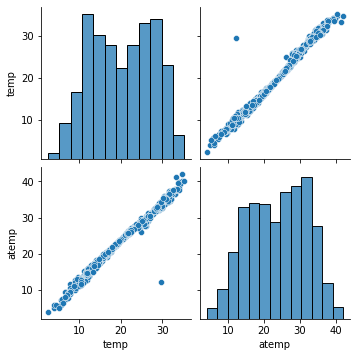

In [520]:
sns.pairplot(Bike_df[['temp','atemp']])
plt.show()

Insight - 
- Predictor columns temp and atemp are very much correlated to each other, so we can drop any one of them, here we are dropping atemp variable

In [521]:
# Drop the atemp variable:
Bike_df.drop(['atemp'],axis=1,inplace=True)

In [522]:
#Check the dataframe again
Bike_df.head()

,season_Spring,season_Summer,season_Winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,...,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,0,0,0,0,1,0,0,0,...,0,jan,0,sat,0,moderate,14.110847,80.5833,10.749882,985
1,1,0,0,0,0,0,1,0,0,0,...,0,jan,0,sun,0,moderate,14.902598,69.6087,16.652113,801
2,1,0,0,0,0,0,1,0,0,0,...,0,jan,0,mon,1,good,8.050924,43.7273,16.636703,1349
3,1,0,0,0,0,0,1,0,0,0,...,0,jan,0,tue,1,good,8.200000,59.0435,10.739832,1562
4,1,0,0,0,0,0,1,0,0,0,...,0,jan,0,wed,1,good,9.305237,43.6957,12.522300,1600


In [523]:
#Checking the dataframe again
Bike_df.shape

(730, 33)

##### Univariate Analysis

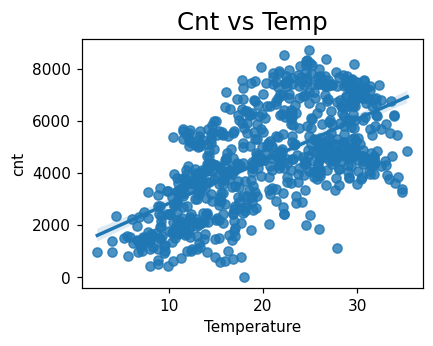

In [524]:
# Univariate Analysis for Cnt vs Temp
plt.figure(figsize=(4,3),dpi=110)
plt.title("Cnt vs Temp",fontsize=16)
sns.regplot(data=Bike_df,y="cnt",x="temp")
plt.xlabel("Temperature")
plt.show()

##### Insight 
 - Demand for bikes is positively correlated to temp.
 - We can see that cnt is linearly increasing with temp indicating linear relation.

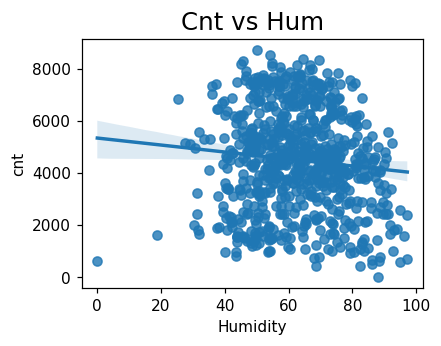

In [525]:
# Univariate Analysis for Cnt vs Hum
plt.figure(figsize=(4,3),dpi=110)
plt.title("Cnt vs Hum",fontsize=16)
sns.regplot(data=Bike_df,y="cnt",x="hum")
plt.xlabel("Humidity")
plt.show()

##### Insight - 
 - Humidity(HUM) is values are more scattered around.
 - Although we can see cnt decreasing with increase in humidity.

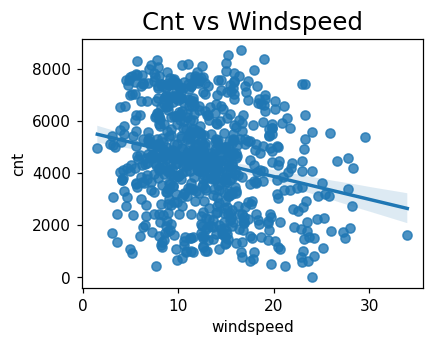

In [526]:
# Univariate Analysis for Cnt vs Windspeed
plt.figure(figsize=(4,3),dpi=110)
plt.title("Cnt vs Windspeed",fontsize=16)
sns.regplot(data=Bike_df,y="cnt",x="windspeed")
plt.show()

##### Insight - 
 - Windspeed values are more scattered around.
 - Although we can see cnt decreasing with increase in windspeed.

In [527]:
# Drop some variables with same meaning and checking for shape
Bike_df.drop(['season','mnth','weekday','weathersit'],axis=1,inplace=True)
Bike_df.shape

(730, 29)

### Model building:
 - Divide the data in to train and test
 - perform scaling
 - Divide the data into X and Y
 - perform linear regression
 - use the mixed appreach(RFE and manual)

##### Divide the data into train and test

In [528]:
Bike_df.shape

(730, 29)

In [529]:
# Using train_test_split we are dividing the dataset into train and test
np.random.seed(0)
Bike_df_train, Bike_df_test = train_test_split(Bike_df, train_size=0.7, test_size=0.3, random_state=100)

In [530]:
#checking shape of train and test dataframes
print("Train dataframe : ",Bike_df_train.shape)
print("Test dataframe : ",Bike_df_test.shape)

Train dataframe :  (510, 29)
Test dataframe :  (219, 29)


In [531]:
# Train data set first 5 rows
Bike_df_train.head()

,season_Spring,season_Summer,season_Winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,...,weekday_wed,weathersit_good,weathersit_moderate,yr,holiday,workingday,temp,hum,windspeed,cnt
653,0,0,1,0,0,0,0,0,0,0,...,0,1,0,1,0,1,19.201653,55.8333,12.208807,7534
576,0,0,0,0,0,0,0,1,0,0,...,0,1,0,1,0,1,29.246653,70.4167,11.083475,7216
426,1,0,0,0,0,0,0,0,0,1,...,0,0,1,1,0,0,16.980847,62.1250,10.792293,4066
728,1,0,0,0,1,0,0,0,0,0,...,0,1,0,1,0,0,10.489153,48.3333,23.500518,1796
482,0,1,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,15.443347,48.9583,8.708325,4220


In [532]:
# Train data set shape
Bike_df_train.shape

(510, 29)

In [533]:
# Train data set statistical values
Bike_df_train.describe()

,season_Spring,season_Summer,season_Winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,...,weekday_wed,weathersit_good,weathersit_moderate,yr,holiday,workingday,temp,hum,windspeed,cnt
count,510.000000,510.000000,510.00000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.243137,0.245098,0.24902,0.096078,0.084314,0.066667,0.088235,0.076471,0.074510,0.098039,...,0.158824,0.627451,0.343137,0.507843,0.025490,0.676471,20.102429,63.112926,12.831318,4486.382353
std,0.429398,0.430568,0.43287,0.294988,0.278131,0.249689,0.283915,0.266010,0.262857,0.297660,...,0.365870,0.483958,0.475223,0.500429,0.157763,0.468282,7.431169,14.156632,5.291832,1952.158739
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.424346,0.000000,2.834381,22.000000
25%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.606865,52.270825,9.041918,3120.000000
50%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,20.209597,63.437500,12.083182,4530.000000
75%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,26.615847,73.250025,15.750879,5973.500000
max,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.328347,97.041700,34.000021,8714.000000


In [534]:
# Test data set shape
Bike_df_test.shape

(219, 29)

In [535]:
## Test data set statistical values
Bike_df_test.describe()

,season_Spring,season_Summer,season_Winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,...,weekday_wed,weathersit_good,weathersit_moderate,yr,holiday,workingday,temp,hum,windspeed,cnt
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.255708,0.264840,0.232877,0.059361,0.086758,0.100457,0.077626,0.105023,0.095890,0.054795,...,0.100457,0.652968,0.319635,0.479452,0.036530,0.698630,20.815737,61.961883,12.600130,4546.981735
std,0.437258,0.442259,0.423633,0.236840,0.282125,0.301297,0.268194,0.307285,0.295115,0.228100,...,0.301297,0.477117,0.467403,0.500722,0.188034,0.459904,7.689600,14.456669,4.984858,1898.633630
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.957390,25.416700,1.500244,441.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.093750,51.166700,9.021282,3303.500000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,20.807500,60.916700,12.167200,4579.000000
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,27.401653,72.192050,15.395629,5869.500000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,34.815847,97.250000,27.999836,8395.000000


In [536]:
## Train data set first 5 rows
Bike_df_test.head()


,season_Spring,season_Summer,season_Winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,...,weekday_wed,weathersit_good,weathersit_moderate,yr,holiday,workingday,temp,hum,windspeed,cnt
184,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,1,0,29.793347,63.7917,5.459106,6043
535,0,1,0,0,0,0,0,0,1,0,...,1,1,0,1,0,1,32.082500,59.2083,7.625404,6211
299,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,1,19.270000,81.2917,13.250121,2659
221,0,0,0,1,0,0,0,0,0,0,...,1,1,0,0,0,1,31.433347,42.4167,13.417286,4780
152,0,1,0,0,0,0,0,0,1,0,...,0,1,0,0,0,1,29.315000,30.5000,19.583229,4968


#### Perform scaling

In [537]:
#Use Normalized scaler to scale
scaler = MinMaxScaler()

#### Perform scaling on train set

hear am not using cnt variable because it is a target variable

In [538]:
#We can apply scaller to all columns except dummy variables and target variable
scale_columns=['temp','hum','windspeed']
Bike_df_train[scale_columns] = scaler.fit_transform(Bike_df_train[scale_columns])

In [539]:
# Checking for values are changed or not
Bike_df_train.head()

,season_Spring,season_Summer,season_Winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,...,weekday_wed,weathersit_good,weathersit_moderate,yr,holiday,workingday,temp,hum,windspeed,cnt
653,0,0,1,0,0,0,0,0,0,0,...,0,1,0,1,0,1,0.509887,0.575354,0.300794,7534
576,0,0,0,0,0,0,0,1,0,0,...,0,1,0,1,0,1,0.815169,0.725633,0.264686,7216
426,1,0,0,0,0,0,0,0,0,1,...,0,0,1,1,0,0,0.442393,0.640189,0.255342,4066
728,1,0,0,0,1,0,0,0,0,0,...,0,1,0,1,0,0,0.245101,0.498067,0.663106,1796
482,0,1,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0.395666,0.504508,0.188475,4220


In [540]:
## checking data set statistical values after scaling
Bike_df_train.describe()

,season_Spring,season_Summer,season_Winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,...,weekday_wed,weathersit_good,weathersit_moderate,yr,holiday,workingday,temp,hum,windspeed,cnt
count,510.000000,510.000000,510.00000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.243137,0.245098,0.24902,0.096078,0.084314,0.066667,0.088235,0.076471,0.074510,0.098039,...,0.158824,0.627451,0.343137,0.507843,0.025490,0.676471,0.537262,0.650369,0.320768,4486.382353
std,0.429398,0.430568,0.43287,0.294988,0.278131,0.249689,0.283915,0.266010,0.262857,0.297660,...,0.365870,0.483958,0.475223,0.500429,0.157763,0.468282,0.225844,0.145882,0.169797,1952.158739
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000
25%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,3120.000000
50%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.540519,0.653714,0.296763,4530.000000
75%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,5973.500000
max,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8714.000000


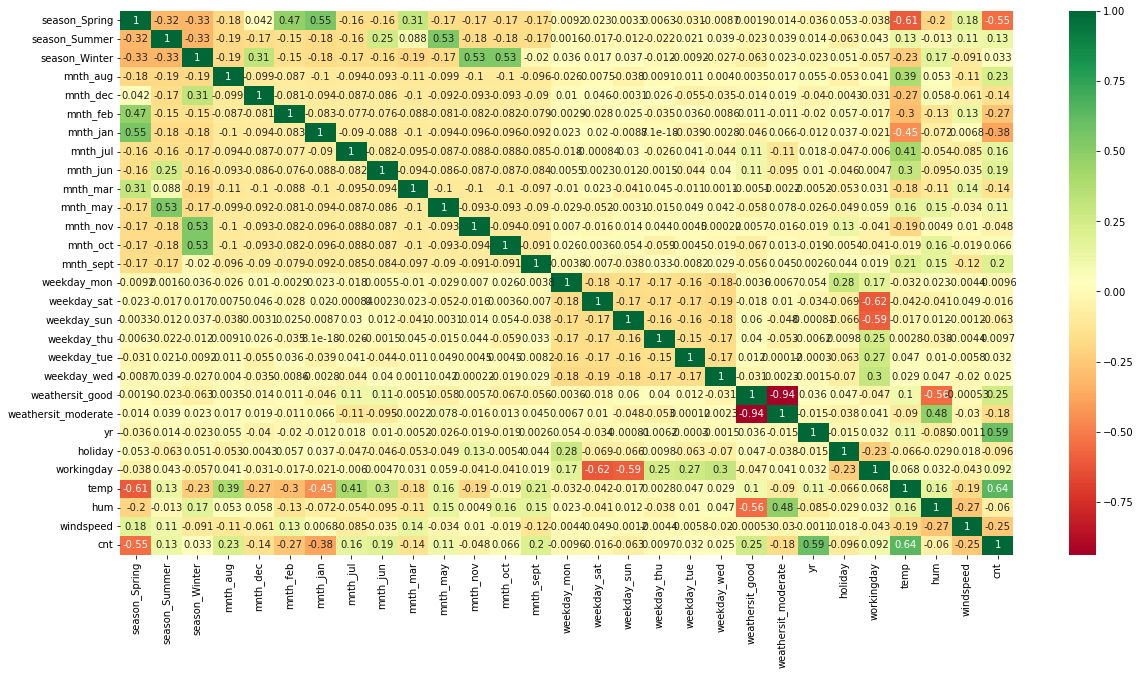

In [541]:
# Let's check the correlation coefficients to see which variables are highly correlated for the train set
plt.figure(figsize = (20, 10))
sns.heatmap(Bike_df_train.corr(), annot = True, cmap="RdYlGn")
plt.show()

##### Insight
 - There is multi-colinearity between the variables.
 - We need to consider the factors when developing the model.
 - workingday variable has high negative correlation with Sat & Sun (where workingday =0)
 - Spring is negatively correlated with temp
 - weathersit_moderate and humidity (hum)has correlation
 - various months and corresponding weather has correlation

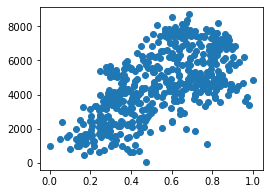

In [542]:
##Let's see a scatterplot for temp vs cnt.
plt.figure(figsize=[4,3])
plt.scatter(Bike_df_train.temp, Bike_df_train.cnt)
plt.show()

##### Insight 
- We pick temp as the first variable and we'll try to fit a regression line to that.

##### Divide the data into X train and Ytrain

In [543]:
#y is contain only target variable
y_train = Bike_df_train.pop("cnt")
#X is all remainign variable also our independent variables
X_train = Bike_df_train

In [544]:
#Inspect independent variables
X_train.head()

,season_Spring,season_Summer,season_Winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,...,weekday_tue,weekday_wed,weathersit_good,weathersit_moderate,yr,holiday,workingday,temp,hum,windspeed
653,0,0,1,0,0,0,0,0,0,0,...,1,0,1,0,1,0,1,0.509887,0.575354,0.300794
576,0,0,0,0,0,0,0,1,0,0,...,1,0,1,0,1,0,1,0.815169,0.725633,0.264686
426,1,0,0,0,0,0,0,0,0,1,...,0,0,0,1,1,0,0,0.442393,0.640189,0.255342
728,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,1,0,0,0.245101,0.498067,0.663106
482,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0.395666,0.504508,0.188475


In [545]:
X_train.columns

Index(['season_Spring', 'season_Summer', 'season_Winter', 'mnth_aug',
       'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun', 'mnth_mar',
       'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sept', 'weekday_mon',
       'weekday_sat', 'weekday_sun', 'weekday_thu', 'weekday_tue',
       'weekday_wed', 'weathersit_good', 'weathersit_moderate', 'yr',
       'holiday', 'workingday', 'temp', 'hum', 'windspeed'],
      dtype='object')

##### Perform linear regression

 - Fit a regression line through the training dataset using statsmodels. 
 - In statsmodels, you need to explicitly fit a constant using sm.add_constant(X) because if we don't perform this step, statsmodels fits a regression line passing through the origin, by default.

#### RFE is a Automated approach

In [546]:
# Build a Lienar Regression model using SKLearn for RFE
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [547]:
#Cut down number of features to 15 using automated approach
rfe = RFE(lr,15)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [548]:
# Checking which parameters have been selected in that list of 15
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('season_Spring', True, 1),
 ('season_Summer', True, 1),
 ('season_Winter', True, 1),
 ('mnth_aug', False, 7),
 ('mnth_dec', False, 3),
 ('mnth_feb', False, 5),
 ('mnth_jan', True, 1),
 ('mnth_jul', True, 1),
 ('mnth_jun', False, 13),
 ('mnth_mar', False, 14),
 ('mnth_may', False, 6),
 ('mnth_nov', False, 4),
 ('mnth_oct', False, 11),
 ('mnth_sept', True, 1),
 ('weekday_mon', False, 8),
 ('weekday_sat', True, 1),
 ('weekday_sun', False, 2),
 ('weekday_thu', False, 10),
 ('weekday_tue', False, 9),
 ('weekday_wed', False, 12),
 ('weathersit_good', True, 1),
 ('weathersit_moderate', True, 1),
 ('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1)]

In [549]:
#Print Columns selected by RFE. We will start with these columns for manual elimination
col = X_train.columns[rfe.support_]
col

Index(['season_Spring', 'season_Summer', 'season_Winter', 'mnth_jan',
       'mnth_jul', 'mnth_sept', 'weekday_sat', 'weathersit_good',
       'weathersit_moderate', 'yr', 'holiday', 'workingday', 'temp', 'hum',
       'windspeed'],
      dtype='object')

In [550]:
# rfe not selected variables
X_train.columns[~rfe.support_]

Index(['mnth_aug', 'mnth_dec', 'mnth_feb', 'mnth_jun', 'mnth_mar', 'mnth_may',
       'mnth_nov', 'mnth_oct', 'weekday_mon', 'weekday_sun', 'weekday_thu',
       'weekday_tue', 'weekday_wed'],
      dtype='object')

In [551]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

#### Manual Model Development using statsmodel

Function to build a model using statsmodel api

In [552]:
#Function to build a model using statsmodel api - Takes the columns to be selected for model as a parameter
def build_model(cols):
    X_train_sm = sm.add_constant(X_train[cols])
    lm = sm.OLS(y_train, X_train_sm).fit()
    print(lm.summary())
    return lm

In [553]:
##### Function to calculate VIFs and print them

In [554]:
#Function to calculate VIFs and print them -Takes the columns for which VIF to be calcualted as a parameter
def get_vif(cols):
    df1 = X_train[cols]
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

#### Model 1

In [555]:
# Add a constant
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

In [556]:
# Check the parameters obtained
lr.params

const                   357.720359
season_Spring          -418.598099
season_Summer           336.594431
season_Winter           920.021411
mnth_aug                125.199371
mnth_dec               -396.232619
mnth_feb               -280.593454
mnth_jan               -545.654115
mnth_jul               -350.722818
mnth_jun                -25.835995
mnth_mar                  9.084485
mnth_may                208.086047
mnth_nov               -363.771604
mnth_oct                 65.481937
mnth_sept               704.572642
weekday_mon            -181.721302
weekday_sat             394.671620
weekday_sun             -79.351772
weekday_thu             -80.285776
weekday_tue            -164.190546
weekday_wed             -46.828209
weathersit_good        2237.692692
weathersit_moderate    1706.903551
yr                     2017.549844
holiday                -356.576398
workingday              398.976908
temp                   3916.282212
hum                   -1315.447663
windspeed           

In [557]:
# Print a summary of the linear regression model obtained
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     103.8
Date:                Wed, 15 Jun 2022   Prob (F-statistic):          8.74e-182
Time:                        21:56:54   Log-Likelihood:                -4097.8
No. Observations:                 510   AIC:                             8252.
Df Residuals:                     482   BIC:                             8370.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 357.7204    

Inferencess:
The p-value for each term tests the null hypothesis that the coefficient is equal to zero (no effect). A low p-value (< 0.05) indicates that you can reject the null hypothesis. Predictor that has a low p-value is likely to be a meaningful addition to th model. SO we can drop variables having p value > 0.05

In [558]:
# We have high P value for mnth_March feature, so we can drop the column and fit the model again.
X_train=X_train.drop('mnth_mar', 1)

#### Model 2

In [559]:
# Add a constant
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr_1 = sm.OLS(y_train, X_train_lm).fit()

In [560]:
# Print the summary of the model
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     108.1
Date:                Wed, 15 Jun 2022   Prob (F-statistic):          8.33e-183
Time:                        21:56:54   Log-Likelihood:                -4097.8
No. Observations:                 510   AIC:                             8250.
Df Residuals:                     483   BIC:                             8364.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 362.3019    

In [561]:
# We have high P value for mnth_March feature, so we can drop the column and fit the model again
X_train=X_train.drop('mnth_jun', 1)

#### Model 3

In [562]:
# Add a constant
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr_2 = sm.OLS(y_train, X_train_lm).fit()

In [563]:
# Print the summary of the model
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     112.6
Date:                Wed, 15 Jun 2022   Prob (F-statistic):          7.84e-184
Time:                        21:56:54   Log-Likelihood:                -4097.8
No. Observations:                 510   AIC:                             8248.
Df Residuals:                     484   BIC:                             8358.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 358.4575    

In [564]:
# We have high P value for mnth_October feature, so we can drop the column and fit the model again
X_train=X_train.drop('mnth_oct', 1)

#### Model 4

In [565]:
# Add a constant
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr_3 = sm.OLS(y_train, X_train_lm).fit()

In [566]:
# Print the summary of the model
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     117.5
Date:                Wed, 15 Jun 2022   Prob (F-statistic):          7.40e-185
Time:                        21:56:54   Log-Likelihood:                -4097.9
No. Observations:                 510   AIC:                             8246.
Df Residuals:                     485   BIC:                             8352.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 373.8300    

In [567]:
# We have high P value for weekday_Wednesday feature, so we can drop the column and fit the model again.
X_train=X_train.drop('weekday_thu', 1)

#### Model 5

In [568]:
# Add a constant
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr_4 = sm.OLS(y_train, X_train_lm).fit()

In [569]:
# Print the summary of the model
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     122.8
Date:                Wed, 15 Jun 2022   Prob (F-statistic):          7.88e-186
Time:                        21:56:54   Log-Likelihood:                -4098.1
No. Observations:                 510   AIC:                             8244.
Df Residuals:                     486   BIC:                             8346.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 352.9230    

In [570]:
# We have high P value for weekday_Sunday feature, so we can drop the column and fit the model again¶
X_train=X_train.drop('weekday_sun', 1)

#### Model 6

In [571]:
# Add a constant
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr_5 = sm.OLS(y_train, X_train_lm).fit()

In [572]:
# Print the summary of the model
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     122.8
Date:                Wed, 15 Jun 2022   Prob (F-statistic):          7.88e-186
Time:                        21:56:54   Log-Likelihood:                -4098.1
No. Observations:                 510   AIC:                             8244.
Df Residuals:                     486   BIC:                             8346.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 291.3999    

In [573]:
# Calculate the VIFs again for the model
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
21,hum,28.56
20,temp,28.35
15,weathersit_good,17.63
16,weathersit_moderate,10.13
0,season_Spring,9.29
1,season_Summer,7.21
19,workingday,7.10
2,season_Winter,7.01
22,windspeed,4.84
3,mnth_aug,3.32


inferencess:
. Hear am choosing the  variable  with high p-value and high VIF value
. The variable workingday has a significantly high VIF (7.56) and a high p-value (0.457) as well. Hence, this variable isn't  much use and it should be dropped.

In [574]:
# We have high P value for workingday feature, so we can drop the column and fit the model again¶
X_train=X_train.drop('workingday', 1)

#### Model 7

In [575]:
# Add a constant
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr_6 = sm.OLS(y_train, X_train_lm).fit()

In [576]:
# Print the summary of the model
print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     124.1
Date:                Wed, 15 Jun 2022   Prob (F-statistic):          1.09e-183
Time:                        21:56:55   Log-Likelihood:                -4105.8
No. Observations:                 510   AIC:                             8258.
Df Residuals:                     487   BIC:                             8355.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 684.5316    

In [577]:
# We have high P value for weekday_Saturday feature, so we can drop the column and fit the model again¶
X_train=X_train.drop('weekday_sat', 1)

#### Model 8

In [578]:
# Add a constant
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr_7 = sm.OLS(y_train, X_train_lm).fit()

In [579]:
# Print the summary of the model
print(lr_7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     129.2
Date:                Wed, 15 Jun 2022   Prob (F-statistic):          5.01e-184
Time:                        21:56:55   Log-Likelihood:                -4107.6
No. Observations:                 510   AIC:                             8259.
Df Residuals:                     488   BIC:                             8352.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 749.6736    

In [580]:
# We have high P value for mnth_August feature, so we can drop the column and fit the model again
X_train=X_train.drop('mnth_aug', 1)

#### Model 9

In [581]:
# Add a constant
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr_8 = sm.OLS(y_train, X_train_lm).fit()

In [582]:
# Print the summary of the model
print(lr_8.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     135.8
Date:                Wed, 15 Jun 2022   Prob (F-statistic):          5.69e-185
Time:                        21:56:55   Log-Likelihood:                -4107.9
No. Observations:                 510   AIC:                             8258.
Df Residuals:                     489   BIC:                             8347.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 831.9168    

In [583]:
# We have high P value for weekday_wednesday  feature, so we can drop the column and fit the model again.
X_train=X_train.drop('weekday_wed', 1)

#### Model 10

In [584]:
# Add a constant
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr_9 = sm.OLS(y_train, X_train_lm).fit()

In [585]:
# Print the summary of the model
print(lr_9.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     142.9
Date:                Wed, 15 Jun 2022   Prob (F-statistic):          7.42e-186
Time:                        21:56:55   Log-Likelihood:                -4108.4
No. Observations:                 510   AIC:                             8257.
Df Residuals:                     490   BIC:                             8341.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 856.6109    

In [586]:
# We have high P value for weekday_wednesday  feature, so we can drop the column and fit the model again.
X_train=X_train.drop('mnth_may', 1)

#### Model 11

In [587]:
# Add a constant
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr_10 = sm.OLS(y_train, X_train_lm).fit()

In [588]:
# Print the summary of the model
print(lr_10.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     150.4
Date:                Wed, 15 Jun 2022   Prob (F-statistic):          1.56e-186
Time:                        21:56:55   Log-Likelihood:                -4109.4
No. Observations:                 510   AIC:                             8257.
Df Residuals:                     491   BIC:                             8337.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 745.2574    

In [589]:
# We have high P value for mnth_Feb feature, so we can drop the column and fit the model again.
X_train=X_train.drop('mnth_feb', 1)

#### Model 12

In [590]:
# Add a constant
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr_11 = sm.OLS(y_train, X_train_lm).fit()

In [591]:
# Print the summary of the model
print(lr_11.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     158.6
Date:                Wed, 15 Jun 2022   Prob (F-statistic):          4.73e-187
Time:                        21:56:55   Log-Likelihood:                -4110.8
No. Observations:                 510   AIC:                             8258.
Df Residuals:                     492   BIC:                             8334.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 655.7446    

In [592]:
# Calculate the VIFs again for the model
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
15,hum,26.51
14,temp,25.16
10,weathersit_good,15.78
11,weathersit_moderate,9.28
0,season_Spring,5.76
16,windspeed,4.67
2,season_Winter,4.54
1,season_Summer,3.28
12,yr,2.11
6,mnth_nov,1.90


In [593]:
# Check the parameters obtained
lr_11.params

const                   655.744645
season_Spring          -541.113020
season_Summer           354.100628
season_Winter           900.364519
mnth_dec               -328.408156
mnth_jan               -381.069471
mnth_jul               -479.722119
mnth_nov               -362.080056
mnth_sept               648.200293
weekday_mon             -64.917981
weekday_tue             -39.590789
weathersit_good        2162.756154
weathersit_moderate    1675.959795
yr                     2004.951193
holiday                -755.665677
temp                   4162.284574
hum                   -1381.883328
windspeed             -1637.377581
dtype: float64

##### The model 12(lr_11) looks good because there are no features which is >0.05 and all the features VIF is less than 3.

#####  Residual Analysis of the train data

In [594]:
y_train_pred = lr_11.predict(X_train_lm)

Text(0.5, 0, 'Errors')

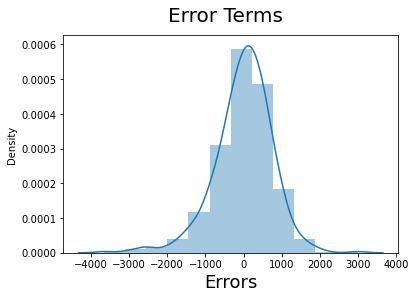

In [595]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 12)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)

Inferencess:
. By looking at the plot it shows clearlly the distplot is like normalality curve

#### Making Predictions Using the Final Model

In [596]:
num_columns=['temp','hum','windspeed']
Bike_df_test[num_columns] = scaler.transform(Bike_df_test[num_columns])

In [597]:
Bike_df_test.describe()

,season_Spring,season_Summer,season_Winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,...,weekday_wed,weathersit_good,weathersit_moderate,yr,holiday,workingday,temp,hum,windspeed,cnt
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.255708,0.264840,0.232877,0.059361,0.086758,0.100457,0.077626,0.105023,0.095890,0.054795,...,0.100457,0.652968,0.319635,0.479452,0.036530,0.698630,0.558941,0.638508,0.313350,4546.981735
std,0.437258,0.442259,0.423633,0.236840,0.282125,0.301297,0.268194,0.307285,0.295115,0.228100,...,0.301297,0.477117,0.467403,0.500722,0.188034,0.459904,0.233698,0.148974,0.159947,1898.633630
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808,441.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.354650,0.527265,0.198517,3303.500000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.558691,0.627737,0.299459,4579.000000
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.759096,0.743928,0.403048,5869.500000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474,8395.000000


#### Dividing the data into X_test and y_test

In [598]:
y_test = Bike_df_test.pop('cnt')
X_test = Bike_df_test

In [599]:
X_test.shape

(219, 28)

In [600]:
y_test.shape

(219,)

In [601]:
# Adding constant variable to test dataframe
X_test_m = sm.add_constant(X_test)

In [602]:
X_train.columns

Index(['season_Spring', 'season_Summer', 'season_Winter', 'mnth_dec',
       'mnth_jan', 'mnth_jul', 'mnth_nov', 'mnth_sept', 'weekday_mon',
       'weekday_tue', 'weathersit_good', 'weathersit_moderate', 'yr',
       'holiday', 'temp', 'hum', 'windspeed'],
      dtype='object')

In [603]:
X_test_m.columns

Index(['const', 'season_Spring', 'season_Summer', 'season_Winter', 'mnth_aug',
       'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun', 'mnth_mar',
       'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sept', 'weekday_mon',
       'weekday_sat', 'weekday_sun', 'weekday_thu', 'weekday_tue',
       'weekday_wed', 'weathersit_good', 'weathersit_moderate', 'yr',
       'holiday', 'workingday', 'temp', 'hum', 'windspeed'],
      dtype='object')

In [604]:
# Creating X_test_m dataframe by dropping variables from X_test_m:

drop_cols = ['mnth_mar','mnth_jun','mnth_oct','weekday_thu','weekday_sun','workingday','weekday_sat',
             'mnth_aug','weekday_wed','mnth_may','mnth_feb']
X_test_m = X_test_m.drop(drop_cols, axis = 1)

In [605]:
y_pred_m = lr_11.predict(X_test_m)

#### Linear Regression Modal Evaluation:
 - Check the various assumptions
 - Check the R square  and adjusted R square
 - Report the final model

##### Validating the assumption of Linear Regression Model :
#####  Check for various assumptions

- Linear Relationship
- Homoscedasticity
- Absence of Multicollinearity
- Independence of residuals
- Normality of Errors

##### Linear Relationship

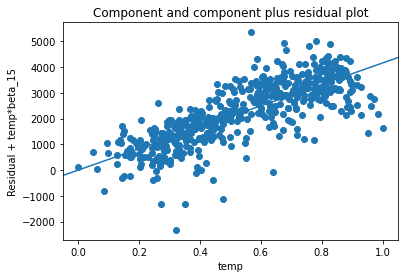

In [606]:
sm.graphics.plot_ccpr(lr_11, 'temp')
plt.show()

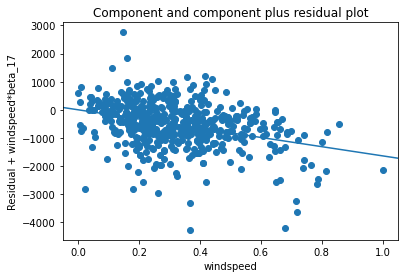

In [607]:
sm.graphics.plot_ccpr(lr_11, 'windspeed')
plt.show()

Inferencess:
. The above plots represents the relationship between the model and the predictor variables. As we can see, linearity is well preserved

##### Homoscedasticity

Text(0, 0.5, 'y_pred')

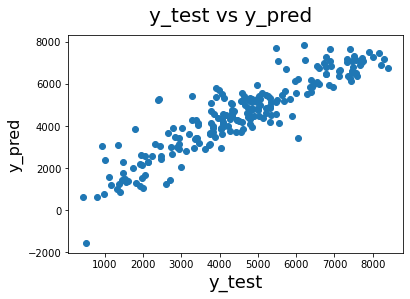

In [608]:
# Plotting y_test and y_pred to understand the spread
fig = plt.figure()
plt.scatter(y_test, y_pred_m)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)

Inferencess:
. There is no visible pattern in residual values.
. We can observe that variance of the residuals (error terms) is constant across predictions. i.e error term does not vary much as the value of the predictor variable changes.

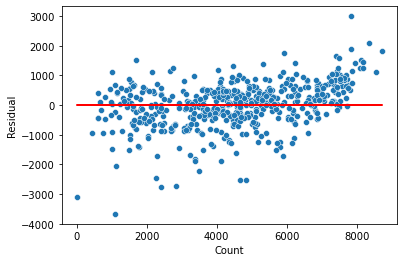

In [609]:
y_train_pred = lr_11.predict(X_train_lm)
residual = y_train - y_train_pred
sns.scatterplot(y_train,residual)
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

Inference:
. There is no visible pattern in residual values, thus homoscedacity is well preserved

##### Absence of Multicolinearity

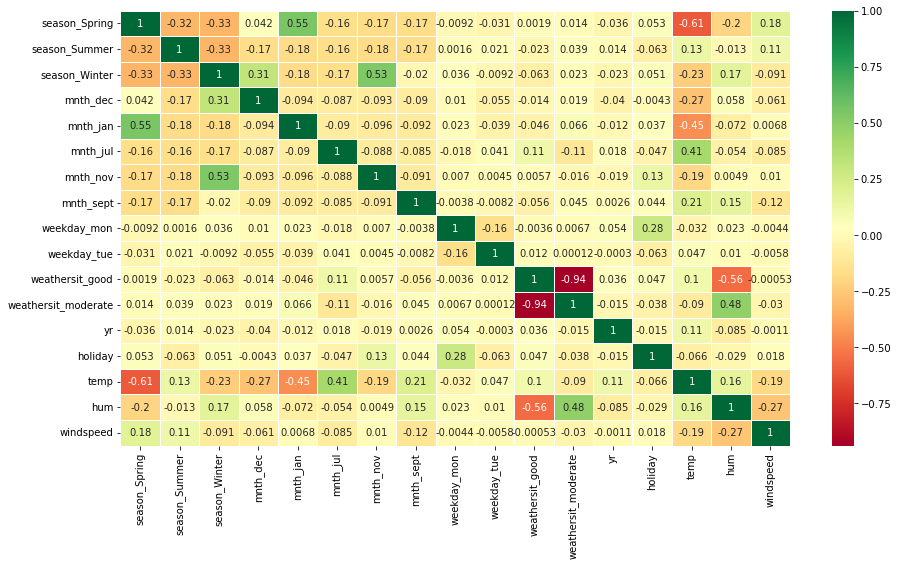

In [610]:
# Validating Multi Colinearity
plt.figure(figsize=(15,8))
sns.heatmap(X_train.corr(),annot = True, cmap="RdYlGn",linewidth =1)
plt.show()

Insight - 
- By observing the corelation matrix/heat map,we can notice some best points that are:
- The season_spring and mnth_jan are  positivelly high corelated with 0.55
- The season_winter and mnth_nov are positivelly corelated with 0.53

##### Independence of residuals

Autocorrelation refers to the fact that observations’ errors are correlated. To verify that the observations are not auto-correlated, we can use the Durbin-Watson test. The test will output values between 0 and 4. The closer it is to 2, the less auto-correlation there is between the various variables.

0 – 2: positive auto-correlation
2 – 4: negative auto-correlation

In [611]:
print('The Durbin-Watson value for Final Model lr_11 is',round(sm.stats.stattools.durbin_watson((y_train - y_train_pred)),4))

The Durbin-Watson value for Final Model lr_11 is 2.0127


##### Insight 
- There is almost no autocorrelation.

##### Normality of error

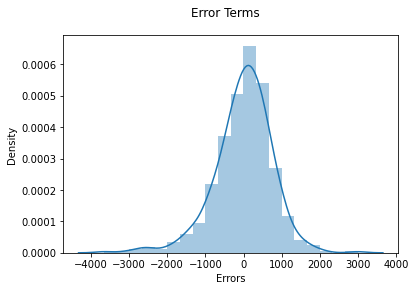

In [612]:
res = y_train-y_train_pred

# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms')                  
plt.xlabel('Errors')                         
plt.show()

Inference:
. The bins are normally distributed

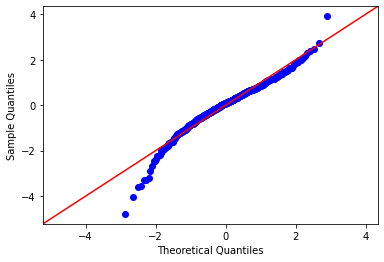

In [613]:
sm.qqplot((y_train - y_train_pred), fit=True, line='45')
plt.show()

Inference: 
. Based on the histogram, we can conclude that error terms are following a normal distribution

#### Predictions using final model

In [614]:
num_vars = ['temp','hum', 'windspeed']
Bike_df_test[num_vars] = scaler.transform(Bike_df_test[num_vars])
Bike_df_test.head()

,season_Spring,season_Summer,season_Winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,...,weekday_tue,weekday_wed,weathersit_good,weathersit_moderate,yr,holiday,workingday,temp,hum,windspeed
184,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,1,0,-0.048400,0.006774,-0.088243
535,0,1,0,0,0,0,0,0,1,0,...,0,1,1,0,1,0,1,-0.046286,0.006287,-0.086013
299,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,-0.058120,0.008632,-0.080222
221,0,0,0,1,0,0,0,0,0,0,...,0,1,1,0,0,0,1,-0.046886,0.004504,-0.080050
152,0,1,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,1,-0.048842,0.003239,-0.073702


In [615]:
Bike_df_test.describe()

,season_Spring,season_Summer,season_Winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,...,weekday_tue,weekday_wed,weathersit_good,weathersit_moderate,yr,holiday,workingday,temp,hum,windspeed
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.255708,0.264840,0.232877,0.059361,0.086758,0.100457,0.077626,0.105023,0.095890,0.054795,...,0.164384,0.100457,0.652968,0.319635,0.479452,0.036530,0.698630,-0.056692,0.006580,-0.080891
std,0.437258,0.442259,0.423633,0.236840,0.282125,0.301297,0.268194,0.307285,0.295115,0.228100,...,0.371472,0.301297,0.477117,0.467403,0.500722,0.188034,0.459904,0.007102,0.001535,0.005132
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.072263,0.002699,-0.092319
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.062901,0.005433,-0.084576
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,-0.056700,0.006469,-0.081337
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,-0.050609,0.007666,-0.078013
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-0.043761,0.010327,-0.065037


In [616]:
#Selecting the variables that were part of final model.
col1=X_train.columns

X_test=X_test[col1]

# Adding constant variable to test dataframe
X_test_lm_11 = sm.add_constant(X_test)

X_test_lm_11.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   const                219 non-null    float64
 1   season_Spring        219 non-null    uint8  
 2   season_Summer        219 non-null    uint8  
 3   season_Winter        219 non-null    uint8  
 4   mnth_dec             219 non-null    uint8  
 5   mnth_jan             219 non-null    uint8  
 6   mnth_jul             219 non-null    uint8  
 7   mnth_nov             219 non-null    uint8  
 8   mnth_sept            219 non-null    uint8  
 9   weekday_mon          219 non-null    uint8  
 10  weekday_tue          219 non-null    uint8  
 11  weathersit_good      219 non-null    uint8  
 12  weathersit_moderate  219 non-null    uint8  
 13  yr                   219 non-null    int64  
 14  holiday              219 non-null    int64  
 15  temp                 219 non-null    fl

In [617]:
X_test_lm_11.columns

Index(['const', 'season_Spring', 'season_Summer', 'season_Winter', 'mnth_dec',
       'mnth_jan', 'mnth_jul', 'mnth_nov', 'mnth_sept', 'weekday_mon',
       'weekday_tue', 'weathersit_good', 'weathersit_moderate', 'yr',
       'holiday', 'temp', 'hum', 'windspeed'],
      dtype='object')

In [618]:
# Making predictions using the final model (lr_11)

y_pred = lr_11.predict(X_test_m)
y_pred

184    3447.220132
535    7834.402286
299    3658.184557
221    5328.054675
152    5259.938226
          ...     
400    3417.386193
702    6008.112709
127    4592.764395
640    7124.771583
72     2551.760079
Length: 219, dtype: float64

Text(0, 0.5, 'y_pred')

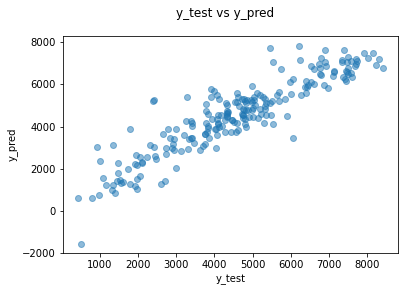

In [619]:
# plotting y_test and y_pred to understand the spread
fig = plt.figure()
plt.scatter(y_test, y_pred,alpha = 0.5)
fig.suptitle('y_test vs y_pred')             
plt.xlabel('y_test')                          
plt.ylabel('y_pred') 

#### R2 Value Calculation for data_test dataframe

In [620]:
r2 = round(r2_score(y_test, y_pred),4)
r2

0.8225

#### R2 Value Calculation for data_train dataframe

In [621]:
print('Train R-Score: ' ,r2_score(y_train,y_train_pred))

Train R-Score:  0.8456417428289594


##### Adjusted R2 Value Calculation for data_test dataframe

In [622]:
# n is number of rows in test dataset
n = X_test.shape[0]

# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]

# We find the Adjusted R-squared using the formula
adjusted_r2 = round(1-(1-r2)*(n-1)/(n-p-1),4)
adjusted_r2

0.8075

##### Adjusted R2 Value Calculation for data_train dataframe

In [623]:
# n is number of rows in train dataset
n = X_train.shape[0]

# Number of features (predictors, p) is the shape along axis 1
p = X_train.shape[1]

# We find the Adjusted R-squared using the formula
adjusted_r2 = round(1-(1-r2)*(n-1)/(n-p-1),4)
adjusted_r2

0.8164

Adjusted R-squared more than 0.81 is a very good value for showing the accuracy. 

#### Calculating RMSE for the selected Model

In [624]:
RMSE = round(sqrt(mean_squared_error(y_test, y_pred)),4)
RMSE

798.1445

#### Calculating Mean Absolute Error for the selected Model

In [625]:
MAE = round(mean_absolute_error(y_test, y_pred),4)
MAE

595.3953

#### Insight - 
- The Root Mean Squared Error value for the test dataset based on final model is 791.1445 and Mean Absolute Error is 590.3953, which indicates that the model is good.
- The MAE and RMSE can range from 0 to ∞. They are negatively-oriented scores: Lower values are better.


#### Intrepretting the Model

#### Reporting the final model

Let's go with interpretting the RFE with Manual model results as we give more importance to imputation

In [626]:
#Lets Rebuild the final model of manual + rfe approach using statsmodel to interpret it
cols = ['season_Spring', 'season_Summer', 'season_Winter', 'mnth_dec',
       'mnth_jan', 'mnth_jul', 'mnth_nov', 'mnth_sept', 'weekday_mon',
       'weekday_tue', 'weathersit_good', 'weathersit_moderate', 'yr',
       'holiday', 'temp', 'hum', 'windspeed']
lm = build_model(cols)


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     158.6
Date:                Wed, 15 Jun 2022   Prob (F-statistic):          4.73e-187
Time:                        21:56:58   Log-Likelihood:                -4110.8
No. Observations:                 510   AIC:                             8258.
Df Residuals:                     492   BIC:                             8334.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 655.7446    

### Linear Regression Model - Summary

##### Significant variables to predict the demand for shared bikes
- Holiday
- Temperature
- Humidity
- Windspeed
- Season(Spring,Summer,Winter)
- Months(January, July, September, November, December)
- Year (2019)
- Monday and Tuesday
- Weathersit(good,moderate)

All the positive coefficients like Temperature, Season_Summer indicate that an increase in these values will lead to an increase in the demand of cnt(Casual and Registered Users).

##### Analysing the above model, the company should focus on the following features:

- Company should focus on expanding business during Spring.
- Company should focus on expanding business during September.
- Based on previous data it is expected to have a boom in number of users once situation comes back to normal, compared to year 2019.
- There would be less bookings during Light Snow or Rain.

##### ------------------------------------------------------------------ End of Analysis -------------------------------------------------------------------- #####